###  Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [3]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [55]:
data = pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [57]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [58]:
data.isna().sum().sum()

0

In [59]:
def norm_fun(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [60]:
data_norm = norm_fun(data.iloc[:,1:])
data_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


## Hierarchy clusters

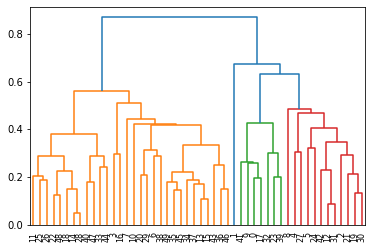

In [61]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dendrogram = sch.dendrogram(sch.linkage(data_norm, method='average'))

In [62]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [63]:
y_hc = hc.fit_predict(data_norm)
y_hc

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [64]:
data['h_clusterid']=hc.labels_
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


## K-Means

In [65]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

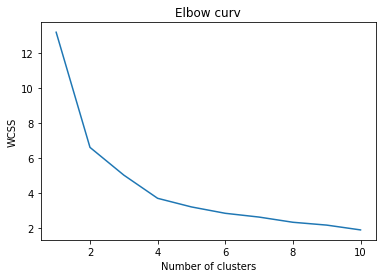

In [66]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [67]:
model = KMeans(n_clusters=3)
model.fit(data_norm)
model.labels_

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [68]:
x = pd.Series(model.labels_)
data['Clust'] = x

In [69]:
data.iloc[:,1:].groupby(data.Clust).mean()

,Murder,Assault,UrbanPop,Rape,h_clusterid,Clust
Clust,,,,,,
0,3.600000,78.538462,52.076923,12.176923,1.769231,0.0
1,12.331579,259.315789,68.315789,29.215789,0.000000,1.0
2,6.016667,143.888889,72.333333,19.344444,0.944444,2.0


## DBSCAN

In [70]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [71]:
data = data.iloc[:,1:5]

In [72]:
stscaler = StandardScaler()
X = stscaler.fit_transform(data.values)

In [73]:
dbscan = DBSCAN(eps=0.8, min_samples=7)
dbscan.fit (X)

DBSCAN(eps=0.8, min_samples=7)

In [74]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0],
      dtype=int64)

In [75]:
data['cluster'] = dbscan.labels_
data

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1
